In [1]:
##############################################################################
import sys
path = "C:\\Users\\Paul Valcke\\Documents\\GitHub\\GEMMES" 
sys.path.insert(0, path)
import pygemmes as pgm
import numpy as np

from itables import init_notebook_mode
import itables.options as opt
init_notebook_mode(all_interactive=True)
from print_dict import pd as printd
%matplotlib inline
#%matplotlib widget
from IPython.display import display,HTML,Markdown
from IPython.display import IFrame

opt.columnDefs = [{"className": "dt-left", "targets": "_all"}]
opt.classes="display nowrap compact"
opt.scrollY="500px"
opt.scrollCollapse=True
opt.paging=False
##############################################################################


pyIDEE

* Version 0.9
* Last update 2023/01/03
* Developped at the environmental justice program https://environmentaljustice.georgetown.edu/#
* Contact : Paul Valcke pv229@georgetown.edu

Welcome in PyIDEE, a modular library to prototype and study dynamical systems !
This library is oriented toward generation of macroeconomic complexity models

If you find bugs, want some new extensions, or help us improve the library, please create a new issue on github
If this is the first time you open this library, please look at the tutorial file in doc/tutorial.py or better, and execute it line by line.

The ipythonNotebook is at : C:\Users\Paul Valcke\Documents\GitHub\GEMMES\pygemmes\doc\TUTORIALS\TUTORIAL.ipynb
If you want to customize pyIDEE (advancer users) like removing this message, edit : C:\Users\Paul Valcke\Documents\GitHub\GEMMES\pygemmes\_config.py


<IPython.core.display.Javascript object>


Changing Dimensions: ['Nprod']
Changing Fields: ['Tini', 'N', 'w0', 'a0', 'D', 'Dh', 'K', 'p', 'z', 'apond', 'alpha', 'n', 'delta', 'eta', 'mu0', 'gammai', 'r', 'philinConst', 'philinSlope', 'Delta', 'k0', 'k1', 'A', 'CESexp', 'b', 'Xi', 'Gamma', 'Cpond', 'sigma', 'V', 'kY', 'kI', 'kC', 'softmin', 'epsilonV']
Changes Ignored:['chi', 'a', 'w', 'employment', 'Tmax', 'dt']
Now Nprod has 3 sectors with names ['Consumption', 'Intermediate', 'Investment']
Identified kY as a value change on all axes
Identified kI as a value change on all axes
Identified kC as a value change on all axes



C:\Users\Paul Valcke\Documents\GitHub\GEMMES\models\Components\_model_Accessibility.py:23: RuntimeWarning: divide by zero encountered in divide
  'func': lambda V,Gamma,kY,softmin,K : np.maximum(0,O.ssum2((1-np.exp(-kY*O.transpose(V/K)/Gamma))**(-softmin))**(-1/softmin)),
C:\Users\Paul Valcke\Documents\GitHub\GEMMES\models\Components\_model_Accessibility.py:30: RuntimeWarning: divide by zero encountered in divide
  'func': lambda V,Xi,kI,softmin,K :    np.maximum(0,O.ssum2((1-np.exp(-kI*O.transpose(V/K) / Xi ))**(-softmin))**(-1/softmin)),
C:\Users\Paul Valcke\Documents\GitHub\GEMMES\models\Components\_model_Accessibility.py:30: RuntimeWarning: overflow encountered in power
  'func': lambda V,Xi,kI,softmin,K :    np.maximum(0,O.ssum2((1-np.exp(-kI*O.transpose(V/K) / Xi ))**(-softmin))**(-1/softmin)),


time step 430 / 1000
time step 823 / 1000
time step 1000 / 1000


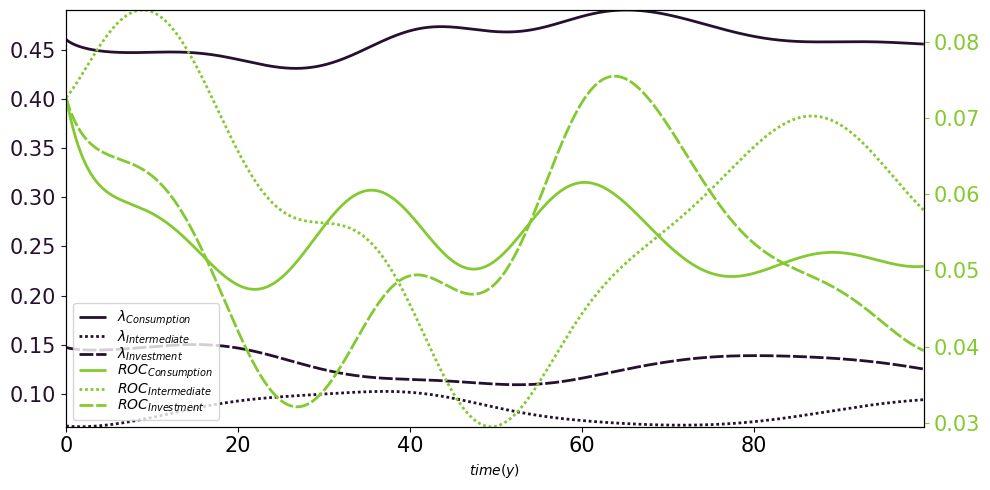

0 Consumption


C:\Users\Paul Valcke\Documents\GitHub\GEMMES\pygemmes\_plots\_plots.py:281: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  dax[ii].set_ylim(ymin, ymax)


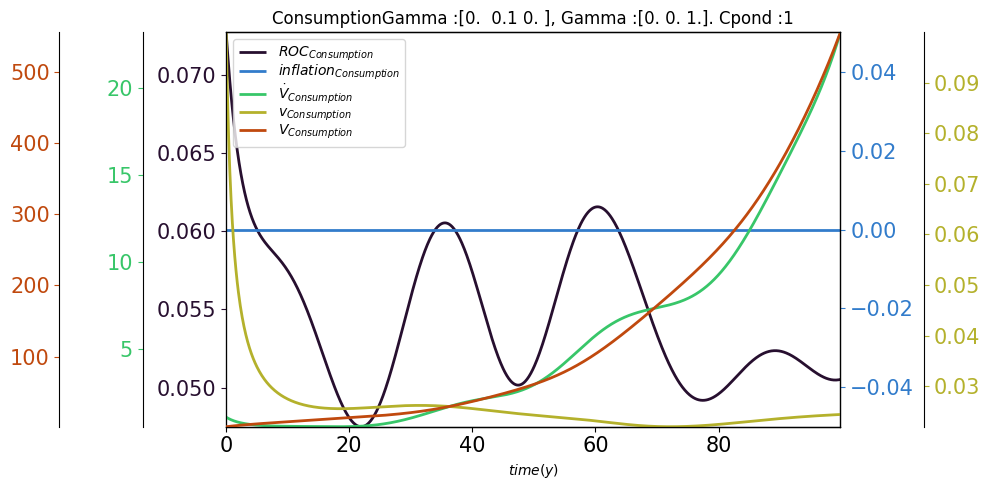

1 Intermediate


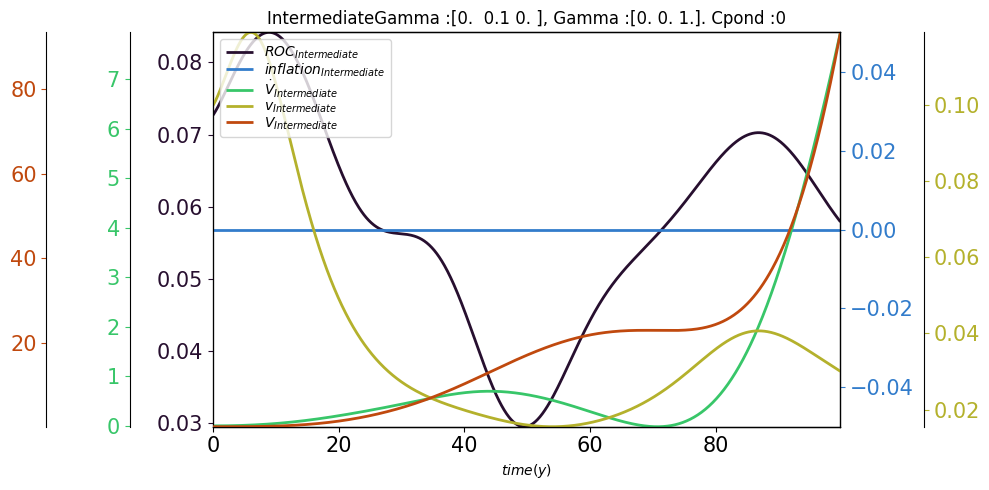

2 Investment


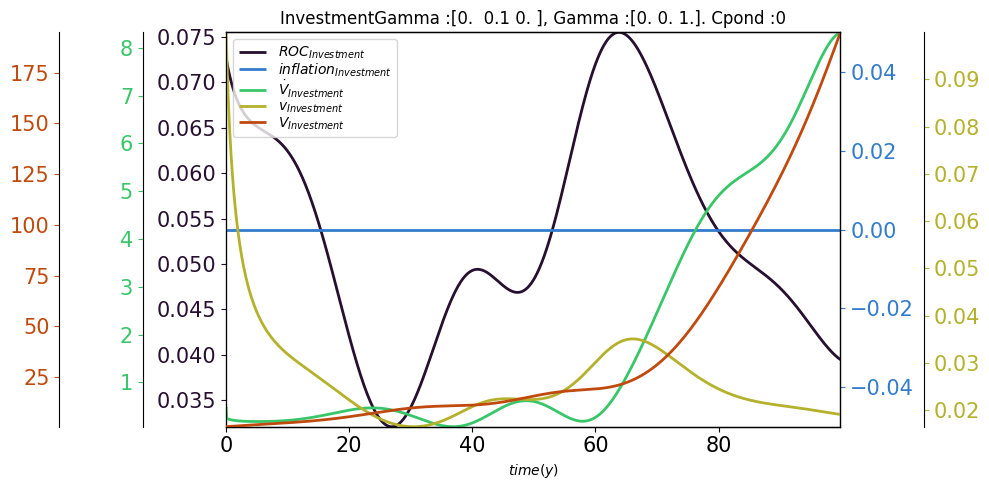

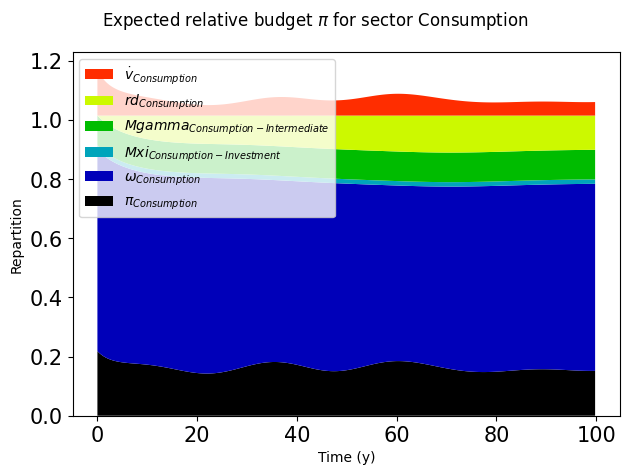

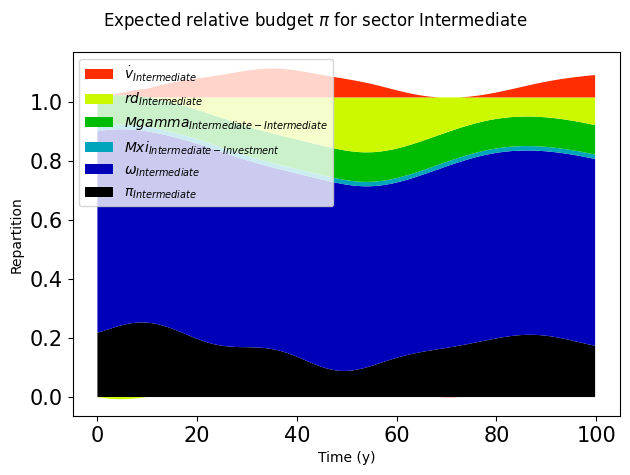

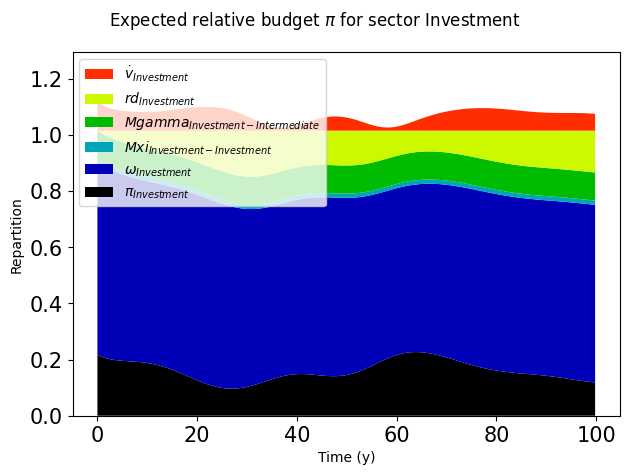

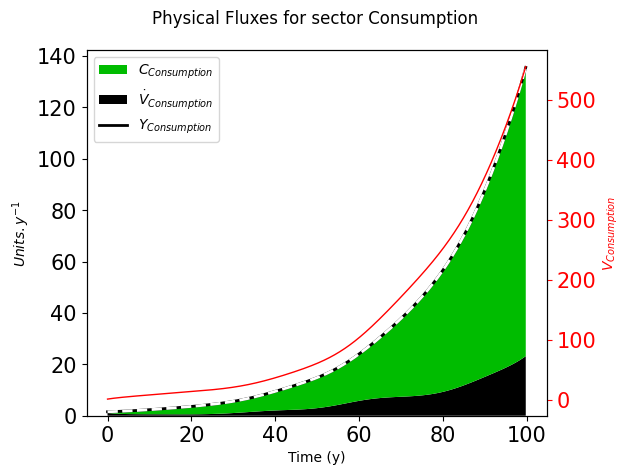

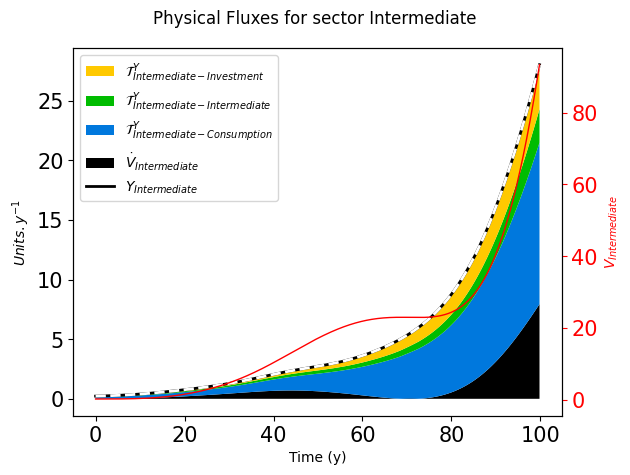

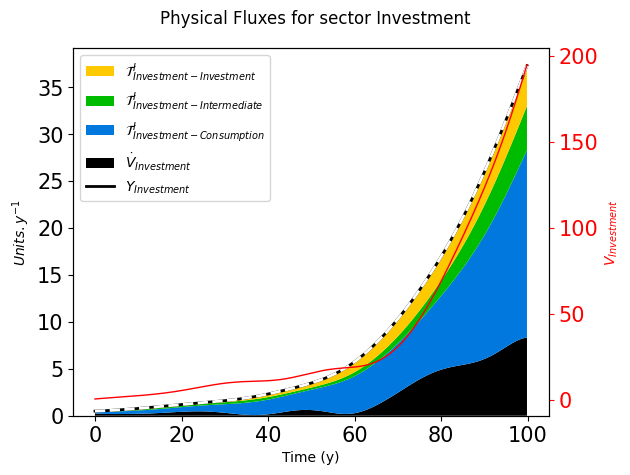

In [2]:
hub=pgm.Hub('CHIMES0',verb=False)
dparam0 = hub.supplements['generateNgoodwin'](3) #Basic N Goodwin dictionnary
dparam0['a'] = dparam0['a0']*dparam0['apond']
dparam0['w'] = dparam0['w0']*dparam0['z']
dparam0['Nprod']= ['Consumption','Intermediate','Investment']
dparam0['Gamma']= np.array([[0. ,0.1,0],
                            [0. ,0.1,0],
                            [0. ,0.1,0]])
dparam0['Xi']   = np.array([[0. ,0. ,1],
                            [0. ,0. ,1],
                            [0. ,0. ,1]])
dparam0['Cpond'] = np.array([1,0,0])


########################################################
### Employment to no wage share change through Philips curve
dparam0['employment']= (dparam0['alpha']-dparam0['philinConst'])/dparam0['philinSlope'] # Linear Philips
#dparam0['employment']= 1 - np.sqrt(dparam0['phi1']/(dparam0['phi0']+dparam0['alpha'])) # Divergent Philips

### Price to ensuire ROC to be the natural growth rate of society
dparam0['p'] = hub.supplements['pForROC'](dparam0)
dparam0['p']*=1.1
### Capital composition to be sure that dotV=0 then scaling for employment and N 
K= hub.supplements['Kfor0dotV'](dparam0)
K*=dparam0['employment']*dparam0['N']/np.sum(K/dparam0['a']) # homotetic scaling for employment and N
dparam0['K']= K
#dparam0['V']=dparam0['K']*dparam0['A']*dparam0['epsilonV']
dparam0['V']=dparam0['K']*dparam0['A']*dparam0['epsilonV']*10

dparam0['kY']= 10
dparam0['kI']= 2
dparam0['kC']= 1      

# RUN AND PLOT ######################################## 
hub.set_dparam(**dparam0,verb=True) 
hub.set_dparam('Tmax',100,verb=False) 

hub.run()

pgm.plots.plotnyaxis(hub,[
                         [['employment',sect] for sect in dparam0['Nprod']],
                         [['ROC',sect] for sect in dparam0['Nprod']],  
                          #[[#['employment',dparam0['Nprod'][1]],
                          #['employment',dparam0['Nprod'][2]]]])
                          ])

for i,sect in enumerate(dparam0['Nprod']):
    print(i,sect)
    title = sect 
    title+=f"Gamma :{dparam0['Gamma'][i,:]}, Gamma :{dparam0['Xi'][i,:]}. Cpond :{dparam0['Cpond'][i]}"
    pgm.plots.plotnyaxis(hub,[[[var,sect]] for var in ['ROC','inflation','dotV','v','V']],title=title)#,tend=20)

#hub.plot()
hub.supplements['PiRepartition'](hub)
hub.supplements['PhysicalFluxes'](hub)
#hub.supplements['MonetaryFluxes'](hub)
pgm.plots.Sankey(hub,t=50)



In [24]:
M=np.tri(5,5).transpose() * 0.1
M2 = M.copy()
M2[-1,-1]=0.2

In [25]:
MI= np.linalg.inv(M)
MI2=np.linalg.inv(M2)

In [26]:
MI

[[ 1.00000000e+01 -1.00000000e+01  5.55111512e-16 -3.08148791e-32
   1.71056941e-48]
 [ 0.00000000e+00  1.00000000e+01 -1.00000000e+01  5.55111512e-16
  -3.08148791e-32]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+01 -1.00000000e+01
   5.55111512e-16]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+01
  -1.00000000e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+01]]
[[ 1.00000000e+01 -1.00000000e+01  5.55111512e-16 -3.08148791e-32
   8.55284707e-49]
 [ 0.00000000e+00  1.00000000e+01 -1.00000000e+01  5.55111512e-16
  -1.54074396e-32]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+01 -1.00000000e+01
   2.77555756e-16]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+01
  -5.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   5.00000000e+00]]


In [16]:
MI

array([[ 1. , -1. ,  0. ,  0. ,  0. ],
       [ 0. ,  1. , -1. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. , -1. ,  0. ],
       [ 0. ,  0. ,  0. ,  1. , -0.5],
       [ 0. ,  0. ,  0. ,  0. ,  0.5]])

In [17]:
MI2

array([[ 1., -1.,  0.,  0.,  0.],
       [ 0.,  1., -1.,  0.,  0.],
       [ 0.,  0.,  1., -1.,  0.],
       [ 0.,  0.,  0.,  1., -1.],
       [ 0.,  0.,  0.,  0.,  1.]])